In [83]:
import pandas as pd
from tiny_data_wharehouse.data_wharehouse import DataWharehouse
tdw = DataWharehouse()

df = tdw.event('arxiv_papers')
df.sort_values(by='published', ascending=False)

,title,abstract,url,published,tdw_timestamp
0,Personalized Collaborative Fine-Tuning for On-...,We explore on-device self-supervised collabora...,http://arxiv.org/abs/2404.09753v1,2024-04-15 12:54:31+00:00,2024-04-16 07:58:47.803105
0,Can We Break Free from Strong Data Augmentatio...,Self-supervised learning (SSL) has emerged as ...,http://arxiv.org/abs/2404.09752v1,2024-04-15 12:53:48+00:00,2024-04-16 07:58:41.714632
0,Quenched Mixing Rates for Doubly Intermittent ...,We study quenched mixing rates for two classes...,http://arxiv.org/abs/2404.09751v1,2024-04-15 12:53:26+00:00,2024-04-16 07:59:27.946871
0,Layered Uploading for Quantum Convolutional Ne...,Continuing our analysis of quantum machine lea...,http://arxiv.org/abs/2404.09750v1,2024-04-15 12:51:51+00:00,2024-04-16 07:59:05.931446
0,Connectivity in Symmetric Semi-Algebraic Sets,Semi-algebraic set is a subset of the real spa...,http://arxiv.org/abs/2404.09749v1,2024-04-15 12:51:03+00:00,2024-04-16 07:59:32.811942
...,...,...,...,...,...
0,Wavelet basis for the Schrödinger equation,"The self-similar representation for the Schr\""...",http://arxiv.org/abs/quant-ph/9505013v1,1995-05-16 16:19:16+00:00,2024-04-03 13:26:18.561439
0,Extended Gauge Sectors,Present and future prospects for the discovery...,http://arxiv.org/abs/hep-ph/9501261v1,1995-01-10 21:40:12+00:00,2024-03-22 13:39:19.963503
0,Coherent States of the SU(N) groups,Coherent states $(CS)$ of the $SU(N)$ groups a...,http://arxiv.org/abs/hep-th/9208017v1,1992-08-05 16:17:28+00:00,2024-03-08 17:30:26.390463
0,From 2D conformal to 4D self-dual theories: qu...,It is shown that self-dual theories generalize...,http://arxiv.org/abs/hep-th/9207089v1,1992-07-27 16:02:00+00:00,2024-04-03 13:26:25.458203


In [4]:
df.dtypes

title                         object
abstract                      object
url                           object
published        datetime64[ns, UTC]
tdw_timestamp         datetime64[ns]
dtype: object

<Axes: xlabel='date'>

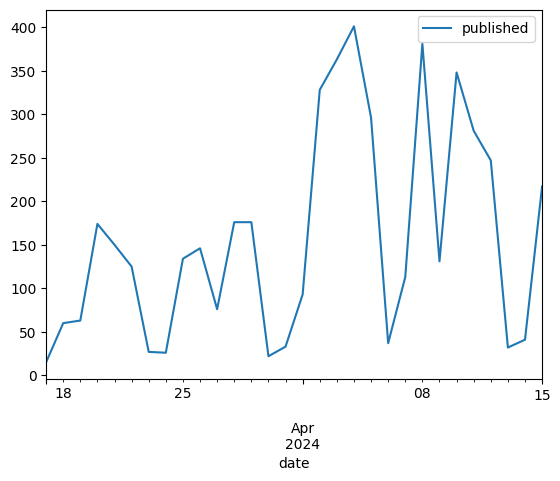

In [88]:
import pandas as pd
new_df = df.groupby(by=df.published.dt.date).agg({'published': 'count'})
new_df['date'] = new_df.index
new_df['published_count'] = new_df['published']


NUM_OF_DAYS = 30
new_df.reset_index(drop=True, inplace=True)
new_df = new_df.sort_values(by='date', ascending=False).head(NUM_OF_DAYS)
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.reset_index(drop=True, inplace=True)
new_df.plot(x='date', y='published')